# Imports and Data loading 

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
plt.rcParams['figure.figsize'] = (7, 7)
from scipy.stats import median_abs_deviation
import sys
from sklearn.linear_model import LinearRegression
from tqdm.autonotebook import tqdm as tqdm
import csv
import os

/tmp/ipykernel_19557/1320298371.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm as tqdm


In [2]:
adata = sc.read("/home/p/pohll/Desktop/MP/data/galapagos_bleo_new_dr_leiden.h5ad")

In [3]:
len(adata.obs["SAMP_ID"].cat.categories)

43

In [4]:
blm_occurrences = [item for item in (adata.obs["SAMP_ID"].cat.categories) if "BLM" in item]
print(len(blm_occurrences))
sal_occurrences = [item for item in (adata.obs["SAMP_ID"].cat.categories) if "Sal" in item]
print(len(blm_occurrences))

23
23


In [4]:
adata

AnnData object with n_obs × n_vars = 104966 × 22348
    obs: 'SAMP_ID', 'Row.names', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ambient_RNA', 'percent_mito', 'percent_ribo', 'S.Score', 'G2M.Score', 'Phase', 'DF_doublet_score', 'DF_call_10pct', 'DF_call_1pct', 'DF_prediction', 'PROJ_bioinf_id', 'PROJ_glpg_id', 'PROJ_area', 'PROJ_species', 'PROJ_tissue', 'PROJ_tissue_detail', 'PROJ_biological_system', 'SAMP_subject_ID', 'SAMP_condition', 'SAMP_treatment', 'SAMP_stage', 'SAMP_exp_group', 'SAMP_sex', 'macrogen_sample_no', 'tube_ID', 'cell_count', 'library_Conc', 'library_size', 'SC_prep', 'treatment', 'perc_BW_change', 'pseudo_AS_score', 'MitochondrialRatio', 'RibosomalRatio', 'nCount_SCT', 'nFeature_SCT', 'clust_res0.3', 'clust_res0.6', 'CELL_celltype_compartment', 'ident', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_count

In [6]:
adata.obs["tube_ID"]

1_Sal_veh_d21_AAACCCAAGACATATG-1    A1
1_Sal_veh_d21_AAACCCAGTATTCTCT-1    A1
1_Sal_veh_d21_AAACCCATCCGCTGTT-1    A1
1_Sal_veh_d21_AAACGCTAGCGGGTTA-1    A1
1_Sal_veh_d21_AAAGGATGTCCGGTCA-1    A1
                                    ..
9_Sal_veh_d21_TTTGGTTTCGTTACCC-1    B3
9_Sal_veh_d21_TTTGTTGAGTCAGAGC-1    B3
9_Sal_veh_d21_TTTGTTGGTCATACCA-1    B3
9_Sal_veh_d21_TTTGTTGTCTCCTACG-1    B3
9_Sal_veh_d21_TTTGTTGTCTGGAGAG-1    B3
Name: tube_ID, Length: 104966, dtype: category
Categories (43, object): ['A1', 'A2', 'A3', 'A4', ..., 'H2', 'H3', 'H4', 'H5']

In [8]:
adata.obs["SAMP_ID"]

1_Sal_veh_d21_AAACCCAAGACATATG-1    1_Sal_veh_d21
1_Sal_veh_d21_AAACCCAGTATTCTCT-1    1_Sal_veh_d21
1_Sal_veh_d21_AAACCCATCCGCTGTT-1    1_Sal_veh_d21
1_Sal_veh_d21_AAACGCTAGCGGGTTA-1    1_Sal_veh_d21
1_Sal_veh_d21_AAAGGATGTCCGGTCA-1    1_Sal_veh_d21
                                        ...      
9_Sal_veh_d21_TTTGGTTTCGTTACCC-1    9_Sal_veh_d21
9_Sal_veh_d21_TTTGTTGAGTCAGAGC-1    9_Sal_veh_d21
9_Sal_veh_d21_TTTGTTGGTCATACCA-1    9_Sal_veh_d21
9_Sal_veh_d21_TTTGTTGTCTCCTACG-1    9_Sal_veh_d21
9_Sal_veh_d21_TTTGTTGTCTGGAGAG-1    9_Sal_veh_d21
Name: SAMP_ID, Length: 104966, dtype: category
Categories (43, object): ['1_Sal_veh_d21', '2_Sal_veh_d21', '3_Sal_veh_d21', '4_Sal_veh_d21', ..., '73_BLM_veh_d42', '75_BLM_veh_d42', '76_BLM_veh_d42', '78_BLM_veh_d42']

Summary data: 

- 43 samples (43 subjects), 23 bleo, 20 control (=SHAM/Sal)--> SAMP_condition
- no treatment
- 2 timepoints: SAMP_stage ['day21', 'day42'] --> also reffered to in weeks ['3W_BLM', '3W_sham', '6W_BLM', '6W_sham'] ("treatment")
- all male
- cell state phases given -->  "Phase"
- SC_prep: ['group1', 'group2', 'group3', 'group4', 'group5', 'group6']

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


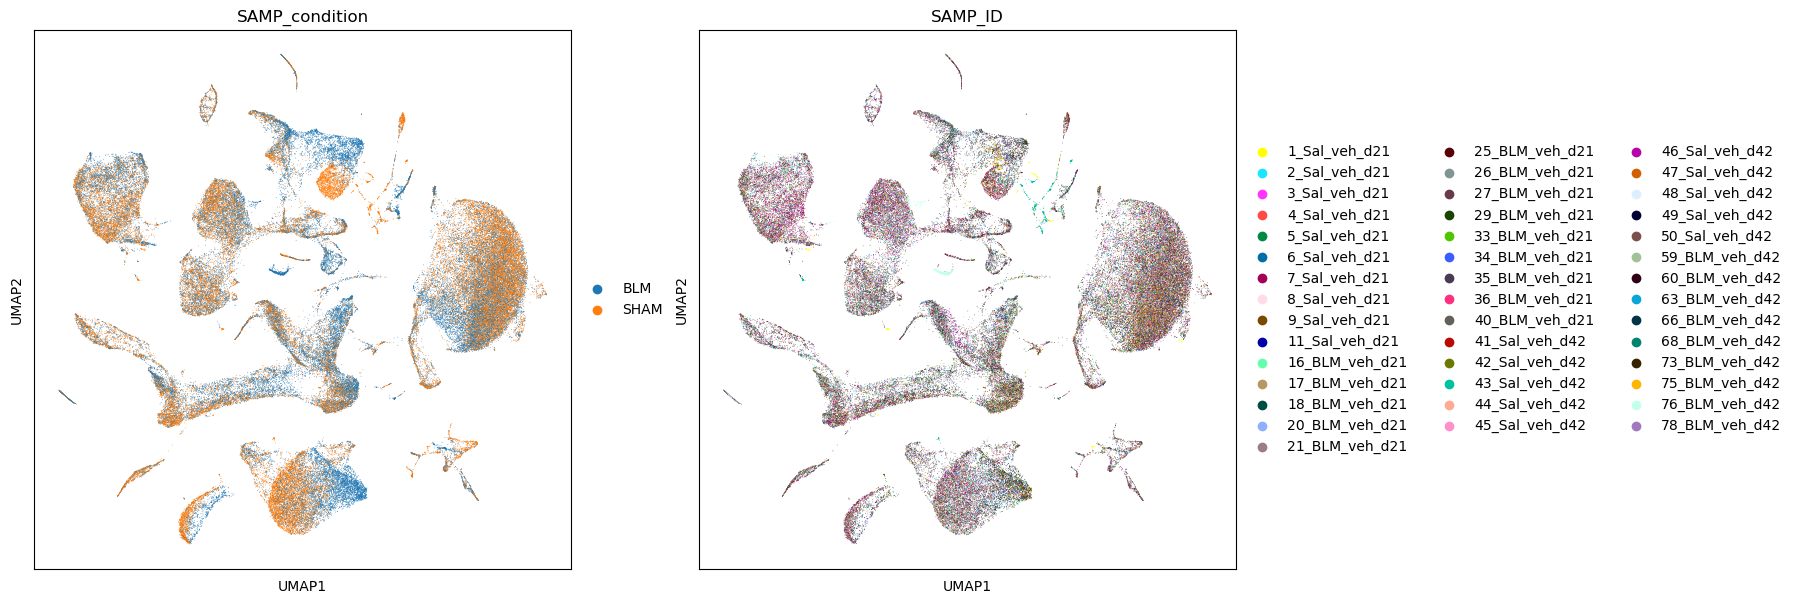

In [6]:
sc.pl.umap(adata, color=[ "SAMP_condition", "SAMP_ID"])

In [6]:
#potential batches: 
covariates = [
    "Phase", # ['G1', 'G2M', 'S'],
    "tube_ID",# ['A1', 'A2', 'A3', 'A4', ..., 'H2', 'H3', 'H4', 'H5']
    "SAMP_ID", # 43 ids 
    "SAMP_condition", # ['BLM', 'SHAM']
    "SAMP_stage",# ['day21', 'day42']
    "SAMP_exp_group", # 'BLM_day21', 'BLM_day42', 'SHAM_day21', 'SHAM_day42']
    "SC_prep", # ['group1', 'group2', 'group3', 'group4', 'group5', 'group6']
    "manual_celltype_annotation_fine_leiden03"
    
]

In [12]:
adata

AnnData object with n_obs × n_vars = 104966 × 22348
    obs: 'SAMP_ID', 'Row.names', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'ambient_RNA', 'percent_mito', 'percent_ribo', 'S.Score', 'G2M.Score', 'Phase', 'DF_doublet_score', 'DF_call_10pct', 'DF_call_1pct', 'DF_prediction', 'PROJ_bioinf_id', 'PROJ_glpg_id', 'PROJ_area', 'PROJ_species', 'PROJ_tissue', 'PROJ_tissue_detail', 'PROJ_biological_system', 'SAMP_subject_ID', 'SAMP_condition', 'SAMP_treatment', 'SAMP_stage', 'SAMP_exp_group', 'SAMP_sex', 'macrogen_sample_no', 'tube_ID', 'cell_count', 'library_Conc', 'library_size', 'SC_prep', 'treatment', 'perc_BW_change', 'pseudo_AS_score', 'MitochondrialRatio', 'RibosomalRatio', 'nCount_SCT', 'nFeature_SCT', 'clust_res0.3', 'clust_res0.6', 'CELL_celltype_compartment', 'ident', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_count

In [7]:
# create shuffled version of single cell platform, and of Processing_site:
sample_to_covariate = pd.DataFrame()
covariates_to_shuffle = [
    "Phase", # ['G1', 'G2M', 'S'],
    #"tube_ID"# ['A1', 'A2', 'A3', 'A4', ..., 'H2', 'H3', 'H4', 'H5']
    #"SAMP_ID", # 43 ids 
    "SAMP_condition", # ['BLM', 'SHAM']
    "SAMP_stage",# ['day21', 'day42']
    "SAMP_exp_group", # 'BLM_day21', 'BLM_day42', 'SHAM_day21', 'SHAM_day42']
    "SC_prep", # ['group1', 'group2', 'group3', 'group4', 'group5', 'group6']
    "manual_celltype_annotation_fine_leiden03"
]

for group in covariates_to_shuffle:
    sample_to_covariate[group] = adata.obs.groupby("tube_ID").agg({group: "first"})
    for i in range(10):
        np.random.shuffle(sample_to_covariate[group])
        adata.obs["shuffled_"+ group + str(i)] = adata.obs["tube_ID"].map(
            dict(
                zip(
                    sample_to_covariate.index,
                    sample_to_covariate[group],
                )
            )
        )
        covariates.append("shuffled_"+ group + str(i))

print(covariates)
sample_to_covariate

/tmp/ipykernel_19557/2542002793.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_covariate[group])
/tmp/ipykernel_19557/2542002793.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_covariate[group])
/tmp/ipykernel_19557/2542002793.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_covariate[group])
/tmp/ipykernel_19557/2542002793.py:17

['Phase', 'tube_ID', 'SAMP_ID', 'SAMP_condition', 'SAMP_stage', 'SAMP_exp_group', 'SC_prep', 'manual_celltype_annotation_fine_leiden03', 'shuffled_Phase0', 'shuffled_Phase1', 'shuffled_Phase2', 'shuffled_Phase3', 'shuffled_Phase4', 'shuffled_Phase5', 'shuffled_Phase6', 'shuffled_Phase7', 'shuffled_Phase8', 'shuffled_Phase9', 'shuffled_SAMP_condition0', 'shuffled_SAMP_condition1', 'shuffled_SAMP_condition2', 'shuffled_SAMP_condition3', 'shuffled_SAMP_condition4', 'shuffled_SAMP_condition5', 'shuffled_SAMP_condition6', 'shuffled_SAMP_condition7', 'shuffled_SAMP_condition8', 'shuffled_SAMP_condition9', 'shuffled_SAMP_stage0', 'shuffled_SAMP_stage1', 'shuffled_SAMP_stage2', 'shuffled_SAMP_stage3', 'shuffled_SAMP_stage4', 'shuffled_SAMP_stage5', 'shuffled_SAMP_stage6', 'shuffled_SAMP_stage7', 'shuffled_SAMP_stage8', 'shuffled_SAMP_stage9', 'shuffled_SAMP_exp_group0', 'shuffled_SAMP_exp_group1', 'shuffled_SAMP_exp_group2', 'shuffled_SAMP_exp_group3', 'shuffled_SAMP_exp_group4', 'shuffled_SAM

/tmp/ipykernel_19557/2542002793.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_covariate[group])
/tmp/ipykernel_19557/2542002793.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_covariate[group])
/tmp/ipykernel_19557/2542002793.py:17: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_covariate[group])
/tmp/ipykernel_19557/2542002793.py:17

,Phase,SAMP_condition,SAMP_stage,SAMP_exp_group,SC_prep,manual_celltype_annotation_fine_leiden03
tube_ID,,,,,,
A1,S,SHAM,day21,BLM_day42,group3,B-cells
A2,G2M,BLM,day21,BLM_day42,group1,Epithelial
A3,S,BLM,day42,BLM_day21,group5,Dendritic cells
A4,G2M,SHAM,day42,BLM_day21,group3,CD4 T-cells
A5,G1,BLM,day42,SHAM_day21,group6,SMCs
A6,G1,SHAM,day42,SHAM_day21,group5,Endothelial
B1,G2M,BLM,day21,BLM_day21,group1,Endothelial
B2,S,BLM,day21,BLM_day21,group5,Endothelial
B3,S,BLM,day42,BLM_day42,group3,Interstitial macrophages


In [8]:
def check_if_nan(value):
    """return Boolean version of value that is True if value is
    some type of NaN (e.g. np.nan, None, "nan" etc). 
    Example use:
    none_entries = subadata.obs.applymap(check_if_nan)
    subadata.obs = subadata.obs.mask(none_entries.values)
    """
    if value == "nan":
        return True
    elif value == None:
        return True
    if isinstance(value, float):
        if np.isnan(value):
            return True
    if value == "ND":
        return True
    return False

In [15]:
n_pcs = 40

In [10]:
covariates

['Phase',
 'tube_ID',
 'SAMP_ID',
 'SAMP_condition',
 'SAMP_stage',
 'SAMP_exp_group',
 'SC_prep',
 'manual_celltype_annotation_fine_leiden03',
 'shuffled_Phase0',
 'shuffled_Phase1',
 'shuffled_Phase2',
 'shuffled_Phase3',
 'shuffled_Phase4',
 'shuffled_Phase5',
 'shuffled_Phase6',
 'shuffled_Phase7',
 'shuffled_Phase8',
 'shuffled_Phase9',
 'shuffled_SAMP_condition0',
 'shuffled_SAMP_condition1',
 'shuffled_SAMP_condition2',
 'shuffled_SAMP_condition3',
 'shuffled_SAMP_condition4',
 'shuffled_SAMP_condition5',
 'shuffled_SAMP_condition6',
 'shuffled_SAMP_condition7',
 'shuffled_SAMP_condition8',
 'shuffled_SAMP_condition9',
 'shuffled_SAMP_stage0',
 'shuffled_SAMP_stage1',
 'shuffled_SAMP_stage2',
 'shuffled_SAMP_stage3',
 'shuffled_SAMP_stage4',
 'shuffled_SAMP_stage5',
 'shuffled_SAMP_stage6',
 'shuffled_SAMP_stage7',
 'shuffled_SAMP_stage8',
 'shuffled_SAMP_stage9',
 'shuffled_SAMP_exp_group0',
 'shuffled_SAMP_exp_group1',
 'shuffled_SAMP_exp_group2',
 'shuffled_SAMP_exp_group3',


In [16]:
var_explained = pd.DataFrame(index=range(n_pcs), columns=covariates + ["overall"])
for pc in tqdm(range(n_pcs)):
    y_true_unfiltered = adata.obsm["X_pca"][:, pc]
    var_explained.loc[pc, "overall"] = np.var(y_true_unfiltered)
    for cov in covariates:
        x = adata.obs[cov].values.copy()
        x_nans = np.vectorize(check_if_nan)(x)
        x = x[~x_nans]
        if len(x) != 0:
            y_true = y_true_unfiltered[~x_nans].reshape(-1, 1)
            if x.dtype in ["float32", "float", "float64"]:
                x = x.reshape(-1, 1)
            else:
                if len(set(x)) == 1:
                    var_explained.loc[pc, cov] = np.nan
                    continue
                x = pd.get_dummies(x)
            lrf = LinearRegression(fit_intercept=True).fit(
                x,
                y_true,
            )
            y_pred = lrf.predict(x)
            var_explained.loc[pc, cov] = np.var(y_pred)
total_variance_explained = np.sum(var_explained, axis=0).sort_values(ascending=False)
total_variance_explained_fractions = (
    total_variance_explained / total_variance_explained["overall"]
)

100%|████████████████████████████████████████████████████████████████████| 40/40 [01:54<00:00,  2.87s/it]


In [14]:
adata.obsm["X_pca"].shape

(104966, 40)

# Visualizition 

In [17]:
total_variance_explained_clean = total_variance_explained_fractions[
    [
        x
        for x in total_variance_explained_fractions.index
        if not x.startswith("shuffled_")
    ]
]
total_variance_explained_clean = total_variance_explained_clean[1:]
total_variance_explained_clean

manual_celltype_annotation_fine_leiden03    0.674317
Phase                                       0.043668
SAMP_ID                                     0.018128
tube_ID                                     0.018125
SC_prep                                     0.004445
SAMP_exp_group                              0.004252
SAMP_condition                              0.002445
SAMP_stage                                  0.001577
dtype: object

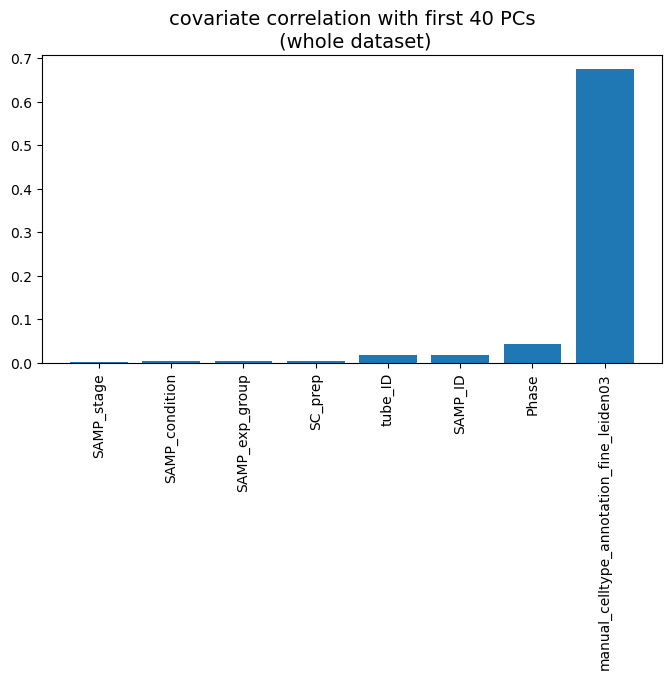

In [19]:
plt.figure(figsize=(8, 4))
plt.bar(
    total_variance_explained_clean[::-1].index,
    total_variance_explained_clean[::-1].values,
)
plt.title(
    "covariate correlation with first 40 PCs\n (whole dataset)",
    fontsize=14,
) 
plt.xticks(rotation=90)
plt.show()

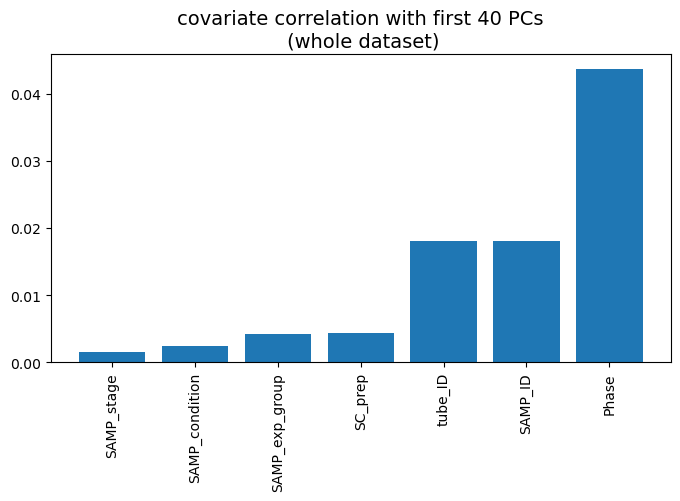

In [21]:
total_variance_explained_without_ann = total_variance_explained_clean[1:]

plt.figure(figsize=(8, 4))
plt.bar(
    total_variance_explained_without_ann[::-1].index,
    total_variance_explained_without_ann[::-1].values,
)
plt.title(
    "covariate correlation with first 40 PCs\n (whole dataset)",
    fontsize=14,
) 
plt.xticks(rotation=90)
plt.show()

In [24]:
groups = [
    "Phase", 
    #"tube_ID", 
    "SAMP_ID",
    "SAMP_condition",
    "SAMP_stage",
    "SAMP_exp_group",
    "SC_prep", 
    "manual_celltype_annotation_fine_leiden03"
]

stdev_single_cell_platform_shuffled = {}
for group in groups:
    total_variance_explained_clean[f"shuffled_{group}"] = np.mean(
        total_variance_explained_fractions[
            [
                x
                for x in total_variance_explained_fractions.index
                if x.startswith(f"shuffled_{group}")
            ]
        ]
    )
    
    stdev_single_cell_platform_shuffled[f"shuffled_{group}"] = np.std(
        total_variance_explained_fractions[
            [
                x
                for x in total_variance_explained_fractions.index
                if x.startswith(f"shuffled_{group}")
            ]
        ]
    )
    
stdev_single_cell_platform_shuffled

{'shuffled_Phase': 0.0003139467716708679,
 'shuffled_SAMP_ID': nan,
 'shuffled_SAMP_condition': 0.0003813028294527443,
 'shuffled_SAMP_stage': 8.947592810711867e-05,
 'shuffled_SAMP_exp_group': 0.0004254551537890776,
 'shuffled_SC_prep': 0.0007052110753410811,
 'shuffled_manual_celltype_annotation_fine_leiden03': 0.00105825417742412}

In [25]:
total_variance_explained_clean.sort_values(ascending=False, inplace=True)
total_variance_explained_clean

manual_celltype_annotation_fine_leiden03             0.674317
Phase                                                0.043668
SAMP_ID                                              0.018128
tube_ID                                              0.018125
shuffled_manual_celltype_annotation_fine_leiden03    0.006173
SC_prep                                              0.004445
SAMP_exp_group                                       0.004252
SAMP_condition                                       0.002445
shuffled_SC_prep                                     0.002364
SAMP_stage                                           0.001577
shuffled_SAMP_exp_group                              0.001423
shuffled_Phase                                        0.00089
shuffled_SAMP_condition                              0.000465
shuffled_SAMP_stage                                  0.000334
shuffled_SAMP_ID                                          NaN
shuffled_annotation                                       NaN
dtype: o

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


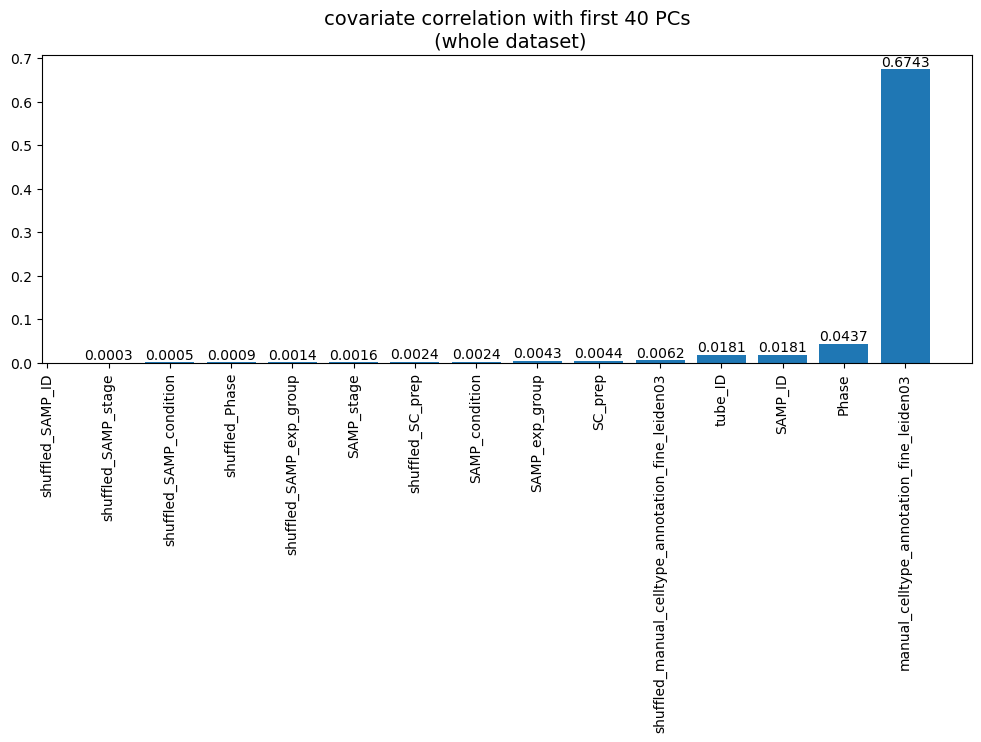

In [27]:
plt.figure(figsize=(12, 4))
rounded_values = total_variance_explained_clean[::-1].values.astype('float').round(4)
plt.bar(
    total_variance_explained_clean[::-1].index,
    rounded_values,
)

# Add rounded numbers on top of the bars
for i, value in enumerate(rounded_values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.title(
    "covariate correlation with first 40 PCs\n (whole dataset)",
    fontsize=14,
)
plt.xticks(rotation=90)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


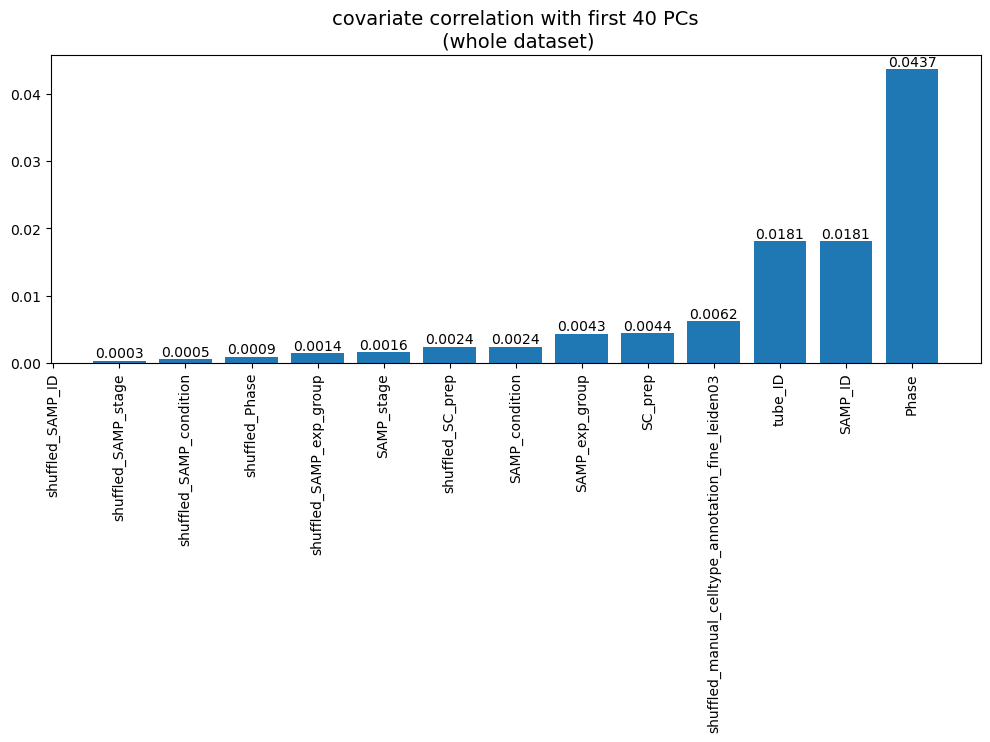

In [29]:
total_variance_explained_clean_ohne_ann = total_variance_explained_clean[1:]
plt.figure(figsize=(12, 4))
rounded_values = total_variance_explained_clean_ohne_ann[::-1].values.astype('float').round(4)
plt.bar(
    total_variance_explained_clean_ohne_ann[::-1].index,
    rounded_values,
)

# Add rounded numbers on top of the bars
for i, value in enumerate(rounded_values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.title(
    "covariate correlation with first 40 PCs\n (whole dataset)",
    fontsize=14,
)
plt.xticks(rotation=90)
plt.show()


## Store results


In [30]:
res = pd.DataFrame(total_variance_explained_clean)
res.columns = ["fraction_of_variance_explained"]
for group in groups:
    res.loc[f"shuffled_{group}", "stdev"] = stdev_single_cell_platform_shuffled[f"shuffled_{group}"]

res

,fraction_of_variance_explained,stdev
manual_celltype_annotation_fine_leiden03,0.674317,NaN
Phase,0.043668,NaN
SAMP_ID,0.018128,NaN
tube_ID,0.018125,NaN
shuffled_manual_celltype_annotation_fine_leiden03,0.006173,0.001058
SC_prep,0.004445,NaN
SAMP_exp_group,0.004252,NaN
SAMP_condition,0.002445,NaN
shuffled_SC_prep,0.002364,0.000705
SAMP_stage,0.001577,NaN


In [31]:
res.to_csv(
    "/home/p/pohll/Desktop/MP/data/galapagos_radiation_variance_explained_per_covariate.csv"
)

In [32]:
for group in groups:
    print(group)
    print(
        (res.loc[group, "fraction_of_variance_explained"]
        - res.loc[f"shuffled_{group}", "fraction_of_variance_explained"]
        ) / res.loc[f"shuffled_{group}", "stdev"]

    )

Phase
136.26054454589413
SAMP_ID
nan
SAMP_condition
5.192124732757559
SAMP_stage
13.885029062506135
SAMP_exp_group
6.648821435751139
SC_prep
2.951564647310669
manual_celltype_annotation_fine_leiden03
631.3643462043269


In [34]:
# final plot for the report 
df = pd.read_csv("/home/p/pohll/Desktop/MP/data/galapagos_radiation_variance_explained_per_covariate.csv")
df.rename(columns={'Unnamed: 0': 'groupings'}, inplace=True)

sorted = ['Phase', 'shuffled_Phase', 'SAMP_ID', "shuffled_SAMP_ID", 'tube_ID', 
          'SAMP_exp_group', 'shuffled_SAMP_exp_group', 'SAMP_condition', "shuffled_SAMP_condition",
         'SC_prep', 'shuffled_SC_prep', 'SAMP_stage', 'shuffled_SAMP_stage' ]
sorted = reversed(sorted)

df['groupings'] = pd.Categorical(df['groupings'], categories=sorted, ordered=True)
df_sorted = df.sort_values('groupings')[0:13]

#print(df_sorted)

filtered = df_sorted[df_sorted.groupings != "shuffled_SAMP_ID"]
filtered

,groupings,fraction_of_variance_explained,stdev
13,shuffled_SAMP_stage,0.000334,0.000089
9,SAMP_stage,0.001577,NaN
8,shuffled_SC_prep,0.002364,0.000705
5,SC_prep,0.004445,NaN
12,shuffled_SAMP_condition,0.000465,0.000381
7,SAMP_condition,0.002445,NaN
10,shuffled_SAMP_exp_group,0.001423,0.000425
6,SAMP_exp_group,0.004252,NaN
3,tube_ID,0.018125,NaN
2,SAMP_ID,0.018128,NaN


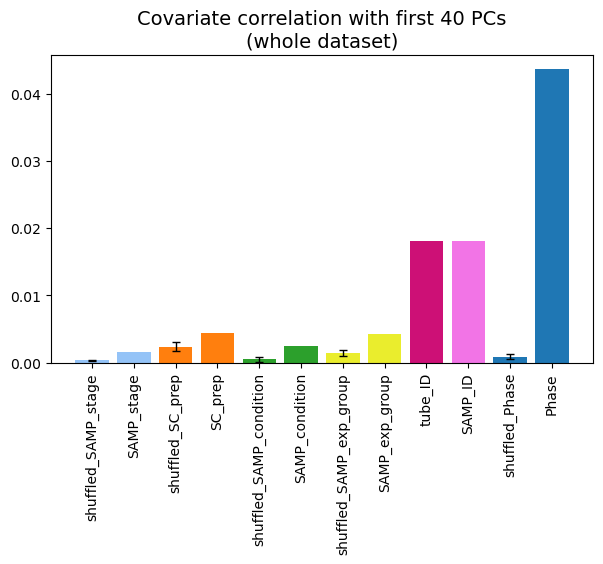

In [36]:
# Colors for the bars
colors = ['#94c3f7', '#94c3f7', '#ff7f0e', '#ff7f0e', '#2ca02c', '#2ca02c', 
         '#eaed2d', '#eaed2d','#CD1076', '#f274e6', '#1f77b4', '#1f77b4']
# Plot
plt.figure(figsize=(7, 4))
rounded_values = filtered["fraction_of_variance_explained"]
x_values = np.arange(len(rounded_values))

# Draw bars and assign colors
plt.bar(x_values, rounded_values, color=colors)

# Add error bars
plt.errorbar(x_values, rounded_values, yerr=filtered["stdev"], fmt='none', ecolor='black', elinewidth=1, capsize=3)

plt.title("Covariate correlation with first 40 PCs\n(whole dataset)", fontsize=14)
plt.xticks(x_values, filtered["groupings"], rotation=90)
plt.show()
